In [ ]:
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 184 kB of archives.
After this operation, 891 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudiocpp0 amd64 19.6.0-1 [15.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 portaudio19-dev amd64 19.6.0-1 [104 kB]
Fetched 184 kB in 0s (610 kB/s)
Selecting p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install librosa soundfile numpy sklearn pyaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=3e6a16c8f211476ef434232143589f505429e714a424de5010be218f541df02e
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for pyaudio: filename=PyAudio-0.2.12-cp37-cp37m-linux_x86_64.whl size=53819 sha256=2b043b39cb5c5b40fa38d4f1cfd63f0c7347c5649d0208cd3fcab3ec24291cb5
  Stored in directory: /root/.cache/pip/wheels/35/e0/b2/0e02f4af505bc69cd9f349eba8d6c558cd07e184a9a16f3537
Successfully built sklearn pyaudio


In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve


In [ ]:

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:

emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}


observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
x,y=[],[]
for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
    file_name=os.path.basename(file)
    emotion=emotions[file_name.split("-")[2]]
    if emotion not in observed_emotions:
        continue
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    x.append(feature)
    y.append(emotion)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(np.array(x), y, test_size=0.25, random_state=9)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
z=y
df=[None] * len(z)
for idx, a in enumerate(z):
    if a==0:
      df[idx]='calm'
    elif a==1:
      df[idx]='happy'
    elif a==2:
      df[idx]='fearful'
    elif a==3:
      df[idx]='disgust'


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


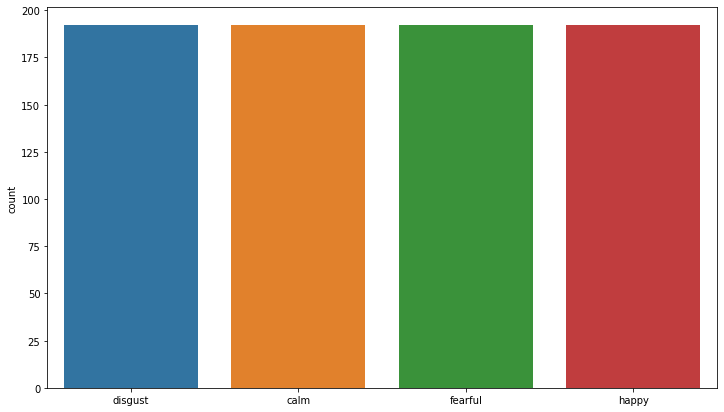

In [ ]:
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
sns.countplot(df)


In [ ]:
z=y_train
df=[None] * len(z)
for idx, a in enumerate(z):
    if a==0:
      df[idx]='calm'
    elif a==1:
      df[idx]='happy'
    elif a==2:
      df[idx]='fearful'
    elif a==3:
      df[idx]='disgust'


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


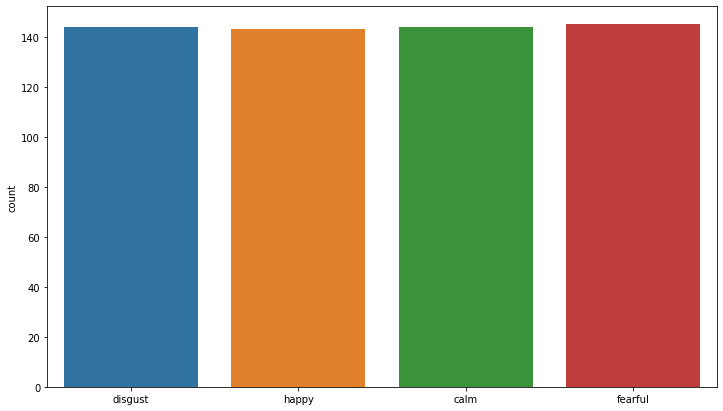

In [ ]:
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')
sns.countplot(df)


In [ ]:
## RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
## training

text_classifier = RandomForestClassifier(n_estimators=400, random_state=0)
text_classifier.fit(x_train, y_train)
## testing
predicitions = text_classifier.predict(x_test)
predicitions_prob = text_classifier.predict_proba(x_test)


# roc curve 
# fpr1, tpr1, thresh1 = roc_curve(y_test, predicitions_prob[:,1], pos_label=1)

CMRF=confusion_matrix(y_test,predicitions)
print(CMRF)
print(classification_report(y_test,predicitions))
print(accuracy_score(y_test,predicitions))

[[44  3  0  1]
 [ 8 28  1 12]
 [ 3 10 23 11]
 [ 3 10 10 25]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        48
           1       0.55      0.57      0.56        49
           2       0.68      0.49      0.57        47
           3       0.51      0.52      0.52        48

    accuracy                           0.62       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.62      0.62      0.62       192

0.625


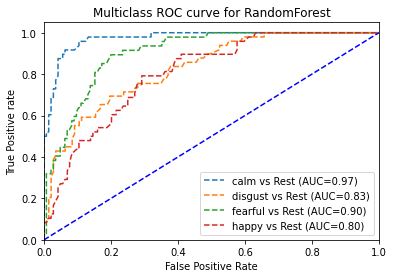

In [ ]:
# plot roc for RandomForest

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], predicitions_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for RandomForest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

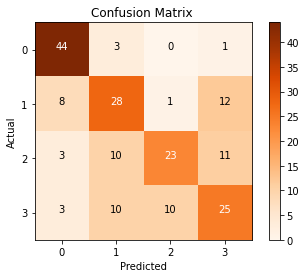

In [ ]:
import itertools
plt.imshow(CMRF,cmap=plt.cm.Oranges,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1','2','3']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = CMRF.max() / 2.
for i,j in itertools.product(range(CMRF.shape[0]),range(CMRF.shape[1])):
    plt.text(j,i,format(CMRF[i,j],'d'),horizontalalignment='center',color='white' if CMRF[i,j] >thresh else 'black')
plt.show();

In [ ]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression

## training
text_classifier = LogisticRegression()
text_classifier.fit(x_train, y_train)

## testing
predicitions = text_classifier.predict(x_test)
predicitions_prob = text_classifier.predict_proba(x_test)

# roc curve 
# fpr2, tpr2, thresh2 = roc_curve(y_test, predicitions_prob[:,1], pos_label=1)

CMRF=confusion_matrix(y_test,predicitions)
print(CMRF)
print(classification_report(y_test,predicitions))
print(accuracy_score(y_test,predicitions))

[[36  7  2  3]
 [11 27  2  9]
 [ 0  6 27 14]
 [ 5  5  7 31]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        48
           1       0.60      0.55      0.57        49
           2       0.71      0.57      0.64        47
           3       0.54      0.65      0.59        48

    accuracy                           0.63       192
   macro avg       0.64      0.63      0.63       192
weighted avg       0.64      0.63      0.63       192

0.6302083333333334


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


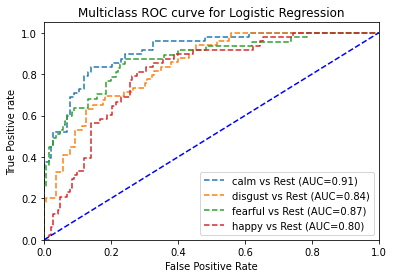

In [ ]:
# plot roc for Logistic Regression

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], predicitions_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

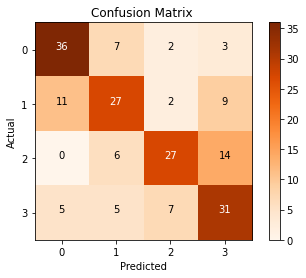

In [ ]:
import itertools
plt.imshow(CMRF,cmap=plt.cm.Oranges,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1','2','3']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = CMRF.max() / 2.
for i,j in itertools.product(range(CMRF.shape[0]),range(CMRF.shape[1])):
    plt.text(j,i,format(CMRF[i,j],'d'),horizontalalignment='center',color='white' if CMRF[i,j] >thresh else 'black')
plt.show();

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
text_classifier = SVC(kernel='linear',probability=True, random_state=0)  

# trainning 
text_classifier.fit(x_train, y_train)  
# testing 
predicitions = text_classifier.predict(x_test)
predicitions_prob = text_classifier.predict_proba(x_test)


# roc curve 
# fpr3, tpr3, thresh3 = roc_curve(y_test, predicitions_prob[:,1], pos_label=1)

CMRF=confusion_matrix(y_test,predicitions)
print(CMRF)
print(classification_report(y_test,predicitions))
print(accuracy_score(y_test,predicitions))

[[40  6  0  2]
 [10 28  3  8]
 [ 2  7 29  9]
 [ 2 10  7 29]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        48
           1       0.55      0.57      0.56        49
           2       0.74      0.62      0.67        47
           3       0.60      0.60      0.60        48

    accuracy                           0.66       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.66      0.66      0.66       192

0.65625


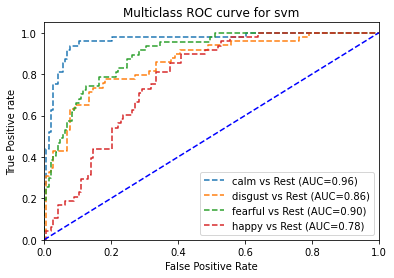

In [ ]:
# plot roc for svm

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], predicitions_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for svm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

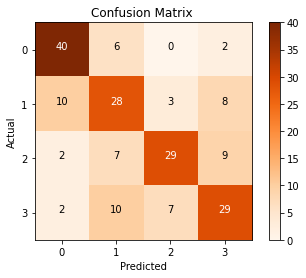

In [ ]:
import itertools
plt.imshow(CMRF,cmap=plt.cm.Oranges,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1','2','3']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = CMRF.max() / 2.
for i,j in itertools.product(range(CMRF.shape[0]),range(CMRF.shape[1])):
    plt.text(j,i,format(CMRF[i,j],'d'),horizontalalignment='center',color='white' if CMRF[i,j] >thresh else 'black')
plt.show();

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
text_classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
# trainning 
text_classifier.fit(x_train, y_train)  
# testing 
predicitions = text_classifier.predict(x_test)
predicitions_prob = text_classifier.predict_proba(x_test)
# roc curve 
# fpr4, tpr4, thresh4 = roc_curve(y_test, predicitions_prob[:,1], pos_label=1)

CMRF=confusion_matrix(y_test,predicitions)
print(CMRF)
print(classification_report(y_test,predicitions))
print(accuracy_score(y_test,predicitions))

[[45  2  0  1]
 [ 5 30  9  5]
 [ 4  9 30  4]
 [ 8 12 14 14]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        48
           1       0.57      0.61      0.59        49
           2       0.57      0.64      0.60        47
           3       0.58      0.29      0.39        48

    accuracy                           0.62       192
   macro avg       0.61      0.62      0.60       192
weighted avg       0.61      0.62      0.60       192

0.6197916666666666


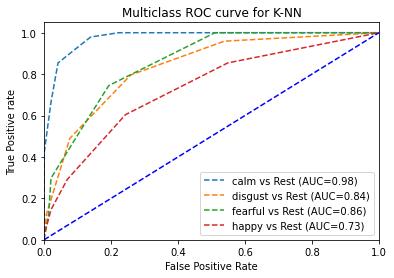

In [ ]:
# plot roc for knn

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], predicitions_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for K-NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

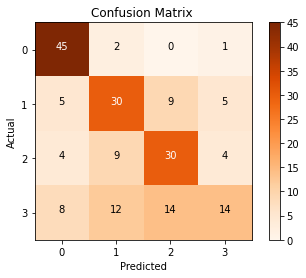

In [ ]:
import itertools
plt.imshow(CMRF,cmap=plt.cm.Oranges,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1','2','3']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = CMRF.max() / 2.
for i,j in itertools.product(range(CMRF.shape[0]),range(CMRF.shape[1])):
    plt.text(j,i,format(CMRF[i,j],'d'),horizontalalignment='center',color='white' if CMRF[i,j] >thresh else 'black')
plt.show();

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
text_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
# trainning 
text_classifier.fit(x_train, y_train)  
# testing 
predicitions = text_classifier.predict(x_test)
predicitions_prob = text_classifier.predict_proba(x_test)

# roc curve 
# fpr5, tpr5, thresh5 = roc_curve(y_test, predicitions_prob[:,1], pos_label=1)

CMRF=confusion_matrix(y_test,predicitions)
print(CMRF)
print(classification_report(y_test,predicitions))
print(accuracy_score(y_test,predicitions))


[[37  8  1  2]
 [ 5 22  5 17]
 [ 1 16 21  9]
 [ 2 12 13 21]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.38      0.45      0.41        49
           2       0.53      0.45      0.48        47
           3       0.43      0.44      0.43        48

    accuracy                           0.53       192
   macro avg       0.54      0.53      0.53       192
weighted avg       0.54      0.53      0.53       192

0.5260416666666666


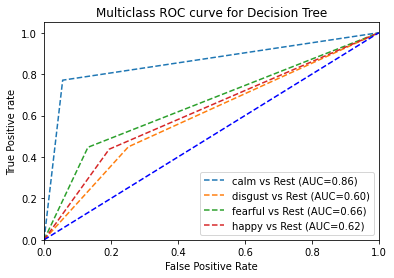

In [ ]:
# plot roc for Decision Tree

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], predicitions_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

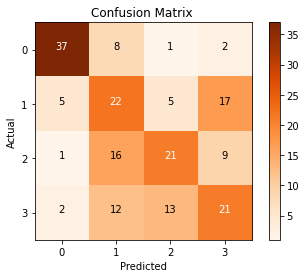

In [ ]:
import itertools
plt.imshow(CMRF,cmap=plt.cm.Oranges,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1','2','3']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = CMRF.max() / 2.
for i,j in itertools.product(range(CMRF.shape[0]),range(CMRF.shape[1])):
    plt.text(j,i,format(CMRF[i,j],'d'),horizontalalignment='center',color='white' if CMRF[i,j] >thresh else 'black')
plt.show();

In [ ]:
## AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

text_classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
# trainning 
text_classifier.fit(x_train, y_train)  
# testing 
predicitions = text_classifier.predict(x_test)
predicitions_prob = text_classifier.predict_proba(x_test)

# roc curve 
# fpr7, tpr7, thresh7 = roc_curve(y_test, predicitions_prob[:,1], pos_label=1)

CMRF=confusion_matrix(y_test,predicitions)
print(CMRF)
print(classification_report(y_test,predicitions))
print(accuracy_score(y_test,predicitions))


[[33 14  0  1]
 [ 2 24  5 18]
 [ 0 12 27  8]
 [ 0 12 15 21]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.80        48
           1       0.39      0.49      0.43        49
           2       0.57      0.57      0.57        47
           3       0.44      0.44      0.44        48

    accuracy                           0.55       192
   macro avg       0.59      0.55      0.56       192
weighted avg       0.58      0.55      0.56       192

0.546875


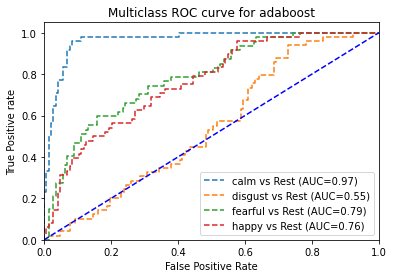

In [ ]:
# plot roc for adaboost

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], predicitions_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve for adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

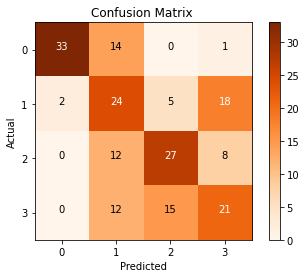

In [ ]:
import itertools
plt.imshow(CMRF,cmap=plt.cm.Oranges,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(set(y_test))) # length of classes
class_labels = ['0','1','2','3']
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = CMRF.max() / 2.
for i,j in itertools.product(range(CMRF.shape[0]),range(CMRF.shape[1])):
    plt.text(j,i,format(CMRF[i,j],'d'),horizontalalignment='center',color='white' if CMRF[i,j] >thresh else 'black')
plt.show();

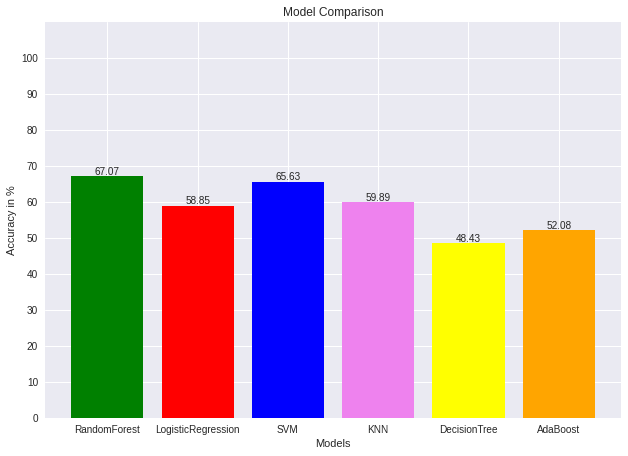

In [ ]:
plt.style.use('seaborn')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
c=['green','red','blue','violet','yellow','orange']
langs = ['RandomForest', 'LogisticRegression', 'SVM', 'KNN', 'DecisionTree','AdaBoost']
countLangs=np.arange(len(langs))
accuracy_label=np.arange(0,110,10)
accuracy = [67.07,58.85,65.63,59.89,48.43,52.08]

plt.bar(langs,accuracy,color=c)
ax.set_xticks(countLangs)

ax.set_xticklabels(langs)

ax.set_yticks(accuracy_label)

ax.set_yticklabels(accuracy_label)

plt.title('Model Comparison')
# x label
plt.xlabel('Models')
# y label
plt.ylabel('Accuracy in %')

plt.ylim(0,110)

for i in range(len(langs)):
  plt.text(i,accuracy[i],accuracy[i],ha='center',va='bottom')


plt.show()